{'MET': <Hist (dataset,MET) instance at 0x7fe9d87c0850>, 'ePt': <Hist (dataset,ePt) instance at 0x7fe8e60bcbe0>, 'mPt': <Hist (dataset,mPt) instance at 0x7fe8e60c6670>, 'eEta': <Hist (dataset,eEta) instance at 0x7fe8e60cc100>, 'mEta': <Hist (dataset,mEta) instance at 0x7fe8e60ccb50>, 'j1Pt': <Hist (dataset,j1Pt) instance at 0x7fe8e60d35e0>, 'j2Pt': <Hist (dataset,j2Pt) instance at 0x7fe8e60d8070>, 'j1Eta': <Hist (dataset,j1Eta) instance at 0x7fe8e60d8ac0>, 'j2Eta': <Hist (dataset,j2Eta) instance at 0x7fe8e60df550>}


/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/plot.py:423: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/plot.py:435: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom ** 2) - rsumw
/afs/hep.wisc.edu/home/kaho/miniconda3/envs/coffeaenv_conda/lib/python3.9/site-packages/coffea/hist/plot.py:452: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom ** 2)


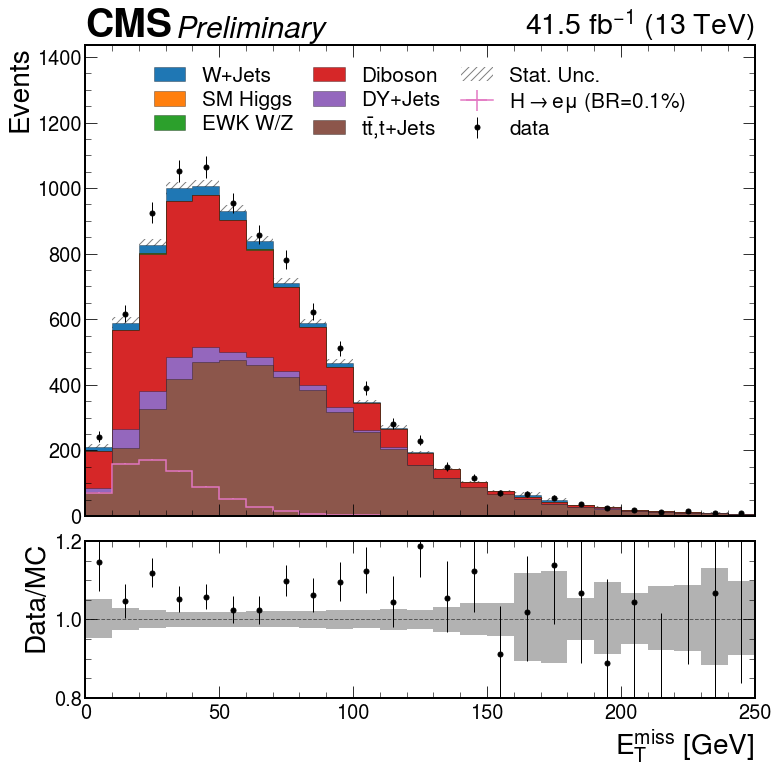

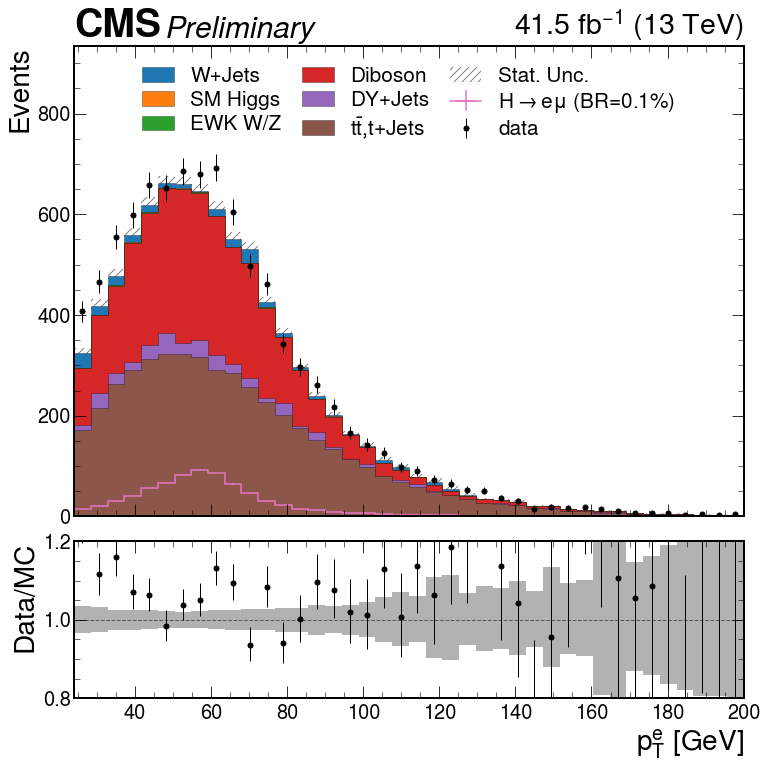

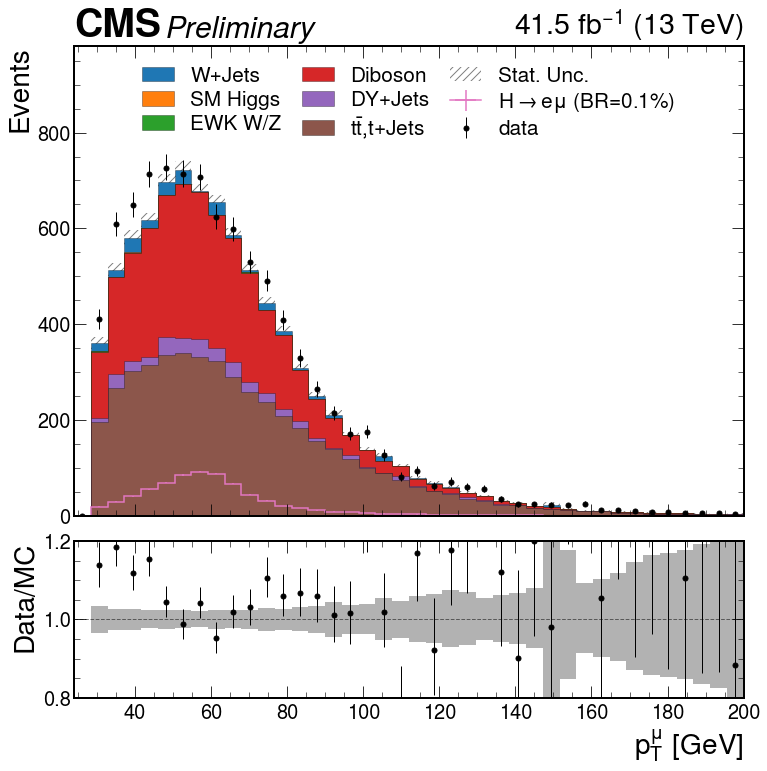

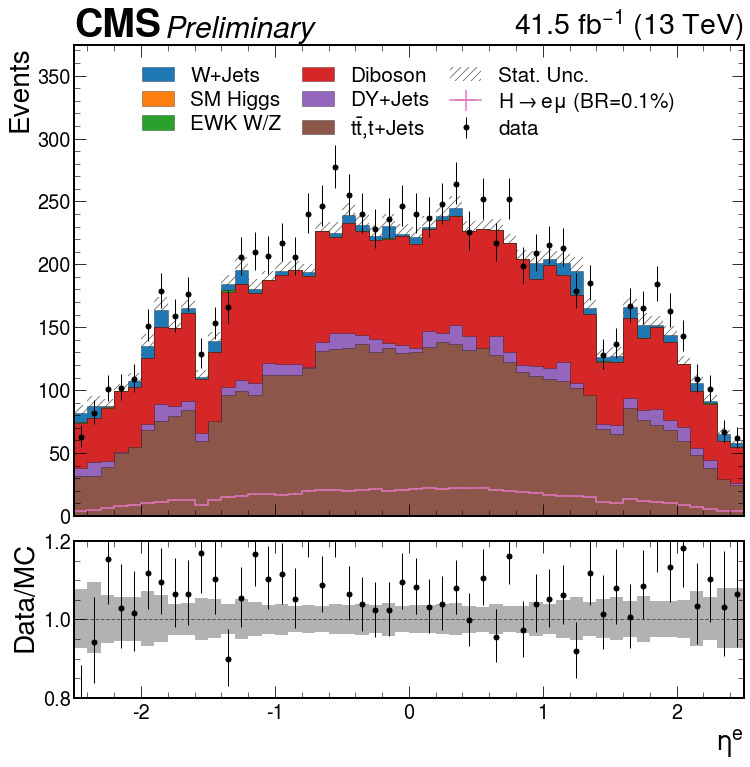

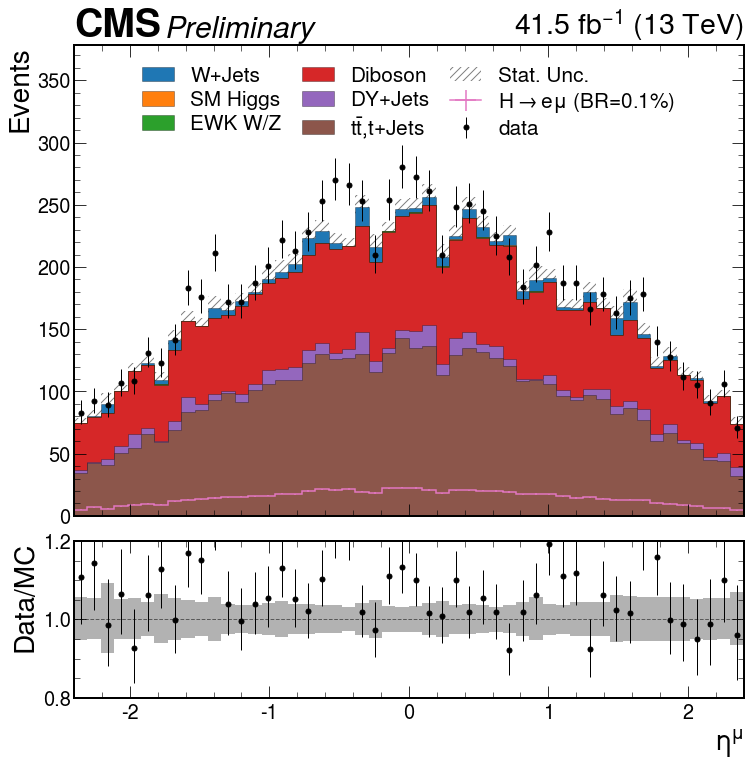

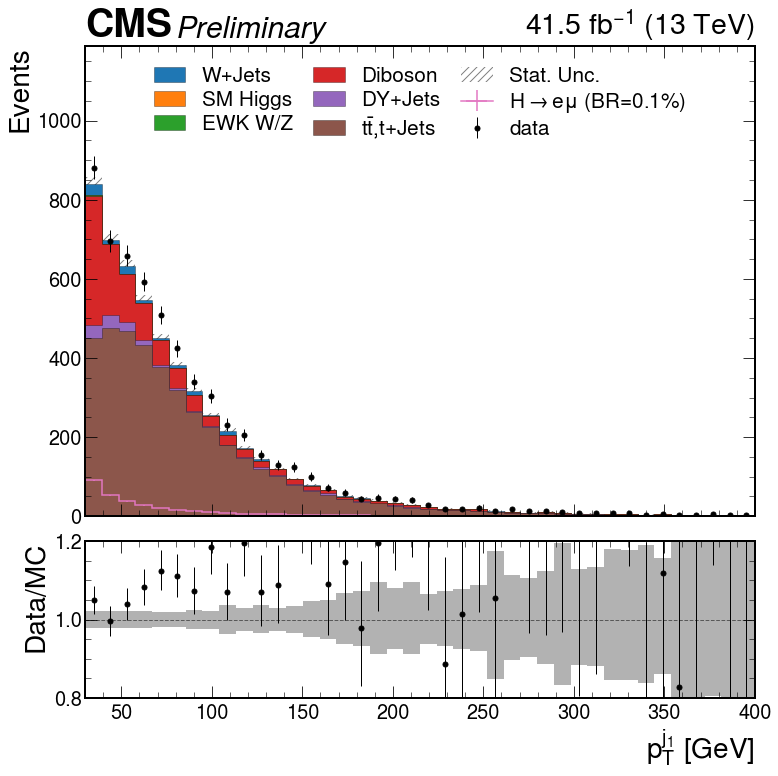

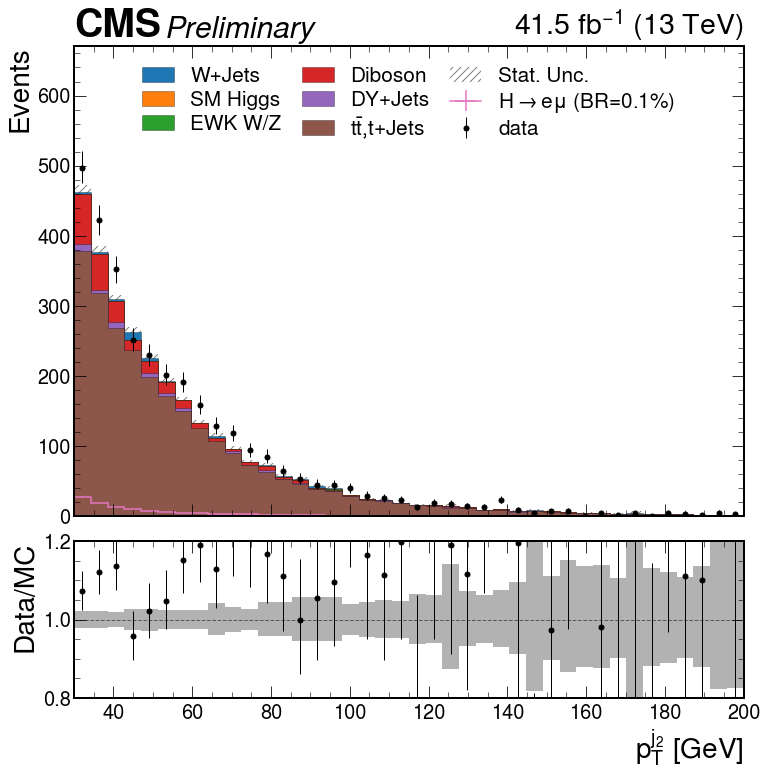

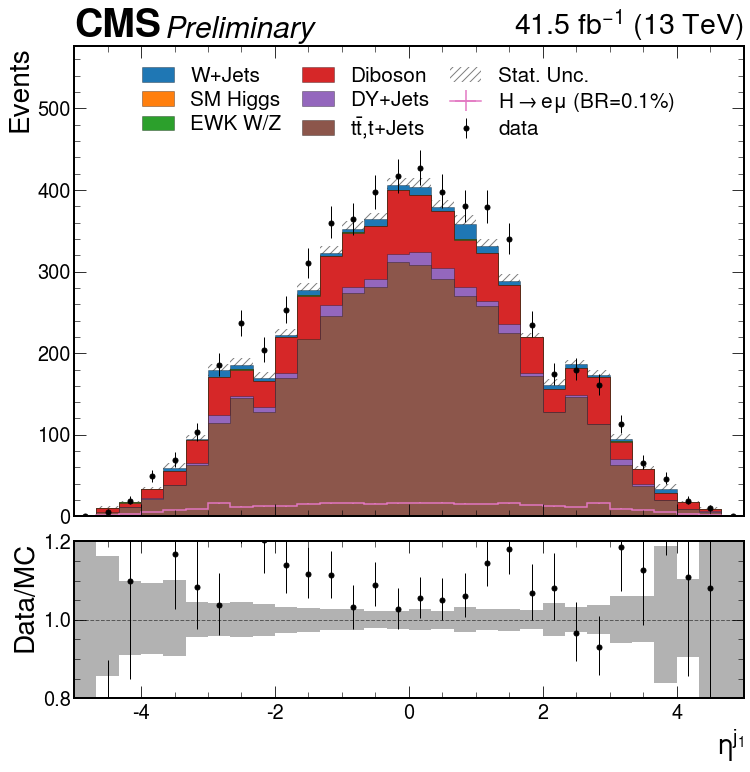

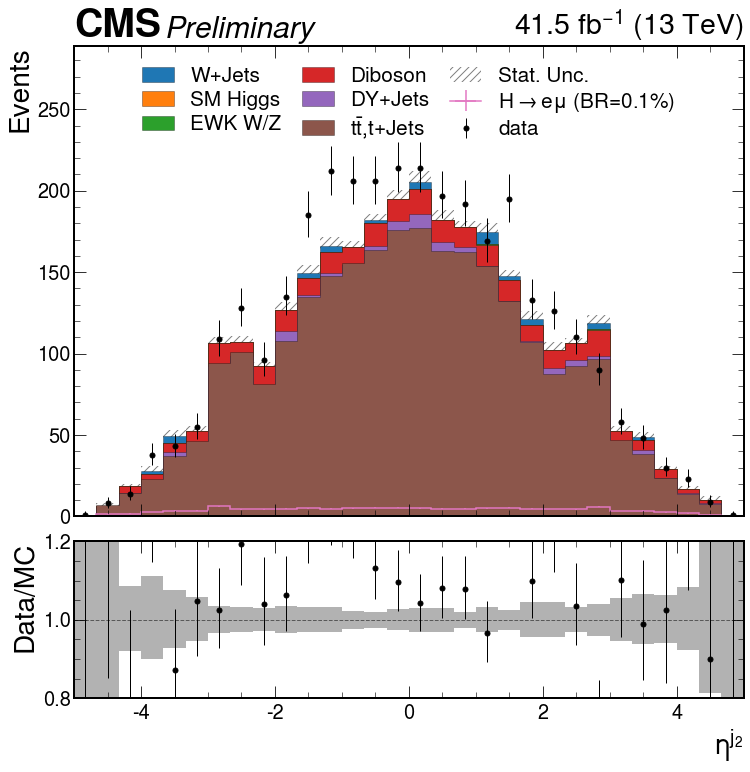

In [1]:
from coffea.util import save, load
from coffea import hist
import mplhep

years = ['2017']#,'2018']
datalumis = {'2016preVFP': 36.3, '2016postVFP': 36.3, '2017': 41.5, '2018': 59.8}

%matplotlib inline

for year in years:
    #histo_dict = load(f"../results/{year}/makeHist/output_btagM.coffea")[0]#_coffea_bTag.coffea")[0]
    histo_dict = load(f"../results/{year}/makeHist/output_coffea_bTag_local.coffea")[0]
    print(histo_dict)

    list_of_bkg = [r'$t\bar{t}$,t+Jets', 'SM Higgs', "DY+Jets", "EWK W/Z", "Diboson", "W+Jets"]
    lis_of_vars = ['MET', 'ePt', 'mPt', 'eEta', 'mEta', 'j1Pt', 'j2Pt', 'j1Eta', 'j2Eta']

    xlabel_dict = {
        "$\eta^{j_{1}}$"
    }

    label_dict = {
        'data': 'data',
        'TTTo2L2Nu': r'$t\bar{t}$',
        'GluGlu_LFV_HToEMu_M125': r'$H\rightarrow e\mu$ (BR=1%)',
        'DYJetsToLL_M-50': r'DY+Jets',
        "Stat. unc.": "Stat. unc."
    }

    for var_ in lis_of_vars:
        histo = histo_dict[var_]
        signal_scale = 0.1
        scales = {
            r'$H\rightarrow e\mu$ (BR=1%)': signal_scale,
        }
        histo.scale(scales, axis='dataset')

        data = histo['data'] 
        bkg = histo[list_of_bkg]
        signal = histo[r'$H\rightarrow e\mu$ (BR=1%)']
        
        import matplotlib.pyplot as plt
        plt.style.use(mplhep.style.CMS)
        
        plt.rcParams.update({
            'font.size': 30,
            'axes.titlesize': 24,
            'axes.labelsize': 28,
            'xtick.labelsize': 20,
            'ytick.labelsize': 20
        })
                
        fig, (ax, rax) = plt.subplots(
            nrows=2,
            ncols=1,
            figsize=(12,12),
            gridspec_kw={"height_ratios": (3, 1)},
            sharex=True
        )
        fig.subplots_adjust(hspace=.08)
        
        fill_opts = {
            'edgecolor': (0,0,0,0.3),
            #'alpha': 0.8
        }
        error_opts = {
            'label': 'Stat. Unc.',
            'hatch': '///',
            'facecolor': 'none',
            'edgecolor': (0,0,0,.5),
            'linewidth': 0
        }
        data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': 'k',
            'elinewidth': 1,
        }
        
        hist.plot1d(
            bkg,
            overlay="dataset",
            ax=ax,
            clear=False,
            stack=True,
            line_opts=None,
            fill_opts=fill_opts,
            error_opts=error_opts
        )
                
        hist.plot1d(
            signal,
            #overlay="dataset",
            ax=ax,
            clear=False,
        )
        
        hist.plot1d(
            data,
            overlay="dataset",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
        )
        
        ax.autoscale(axis='x', tight=True)
        ax.set_ylim(0, max(data.sum("dataset")._sumw[()])*1.35)
        ax.set_xlabel(None)
        
        label_list = []
        for t in ax.get_legend_handles_labels():
            label_list.append(t)
        new_label_list = []
        for txt in label_list[1]:
            if txt[0] == '0':
                txt = str(txt)[:4]
            if txt==r'$H\rightarrow e\mu$ (BR=1%)':
                new_label_list.append(r'$H\rightarrow e\mu$ (BR={:.1f}%)'.format(signal_scale))
            else:
                new_label_list.append(txt)
        label_list[1] = new_label_list
        leg = ax.legend(fontsize='x-small', ncol=3, columnspacing=1, labelspacing=0.25, loc=9, handles=label_list[0], labels=label_list[1])
        
        hist.plotratio(
            num=data.sum("dataset"),
            denom=bkg.sum("dataset"),
            ax=rax,
            error_opts=data_err_opts,
            denom_fill_opts={},
            guide_opts={},
            unc='num'
        )
        
#         from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
#         rax.xaxis.set_minor_locator(AutoMinorLocator()) #rax.minorticks_on()
        rax.set_ylim(0.8, 1.2)
        rax.set_ylabel("Data/MC", loc='center')
        
        lumi = mplhep.cms.label(ax=ax, lumi=datalumis[year], label="Preliminary", data=1)


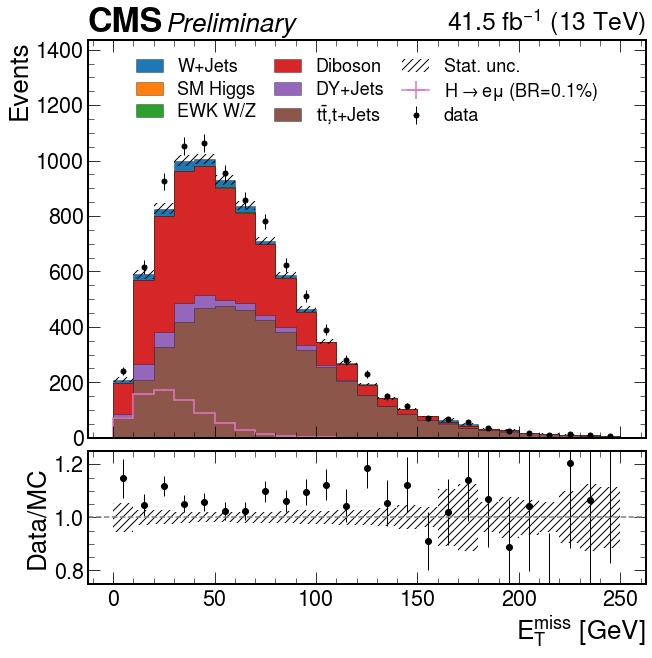

In [20]:
from coffea.util import save, load
from coffea import hist

years = ['2017']#,'2018']
datalumis = {'2016preVFP': 36.3, '2016postVFP': 36.3, '2017': 41.5, '2018': 59.8}

%matplotlib inline

for year in years:
    histo_dict = load(f"../results/{year}/makeHist/output_btagM.coffea")[0]

    list_of_bkg = [r'$t\bar{t}$,t+Jets', 'SM Higgs', "DY+Jets", "EWK W/Z", "Diboson", "W+Jets"]
    lis_of_vars = ['MET']#, 'ePt', 'mPt', 'eEta', 'mEta', 'j1Pt', 'j2Pt', 'j1Eta', 'j2Eta']

    xlabel_dict = {
        "$\eta^{j_{1}}$"
    }

    label_dict = {
        'data': 'data',
        'TTTo2L2Nu': r'$t\bar{t}$',
        'GluGlu_LFV_HToEMu_M125': r'$H\rightarrow e\mu$ (BR=1%)',
        'DYJetsToLL_M-50': r'DY+Jets',
        "Stat. unc.": "Stat. unc."
    }

    for var_ in lis_of_vars:
        histo = histo_dict[var_]
        scales = {
            r'$H\rightarrow e\mu$ (BR=1%)': 0.1,
        }
        histo.scale(scales, axis='dataset')

        data = histo[['data'], :].to_hist()
        bkg = histo[list_of_bkg, :].to_hist()
        signal = histo[[r'$H\rightarrow e\mu$ (BR=1%)'], :].to_hist()

        import matplotlib.pyplot as plt
        import mplhep
        plt.style.use(mplhep.style.CMS)

        # define a ratio plot figure
        fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.05), sharex=True)
        #fig, ax = plt.subplots()

    #     from cycler import cycler
    #     colors = ['#1f78b4','#33a02c','#e31a1c']
    #     ax.set_prop_cycle(cycler(color=colors))

        bkg.plot1d(
            ax=ax,
            overlay="dataset",
            histtype="fill",
            stack=True,
            #alpha=0.5,
            edgecolor=(0, 0, 0, 0.3),
        )

        signal.plot1d(
            ax=ax,
            overlay="dataset",
            #histtype="fill",
            #stack=True,
            #alpha=0.5,
            #edgecolor=(0, 0, 0, 0.3),
            #label=r'$H\rightarrow e + \mu$'
        )

        data.plot1d(ax=ax, histtype="errorbar", color="k")

        total_bkg_sumw2 = histo[list_of_bkg, :].integrate('dataset').values(True)[()][1] #bkg[::sum, :].to_numpy()[0]
        total_bkg_view = bkg[::sum, :].to_numpy()[0]

        total_trig_unc = total_bkg_sumw2*0.02
        total_ele_unc = total_bkg_sumw2*0.02
        total_mu_unc = total_bkg_sumw2*0.02
        total_lumi_unc = total_bkg_sumw2*0.023
        
        total_tt_unc = histo[r'$t\bar{t}$,t+Jets', :].integrate('dataset').values(True)[()][1]*0.06
        total_SM_unc = 0 #np.sqrt(histo['SM Higgs', :].integrate('dataset').values(True)[()][1])
        total_DY_unc = np.sqrt(histo['DY+Jets', :].integrate('dataset').values(True)[()][1])*0.04
        total_EWK_unc = np.sqrt(histo['EWK W/Z', :].integrate('dataset').values(True)[()][1])*0.04
        total_DB_unc = np.sqrt(histo['Diboson', :].integrate('dataset').values(True)[()][1])*0.05
        total_WJ_unc = 0 #np.sqrt(histo['W+Jets', :].integrate('dataset').values(True)[()][1]) 

        total_unc = total_trig_unc+total_ele_unc+total_mu_unc+total_lumi_unc\
                    +total_tt_unc+total_SM_unc+total_DY_unc+total_EWK_unc+total_DB_unc+total_WJ_unc

        data_view = data[::sum, :].to_numpy()[0]
        
        xlabel = ax.get_xlabel()
        ax.set_xlabel("")
        ax.set_ylabel("Events")
        ax.set_ylim(0, max(data_view)*1.35)

        import numpy as np

        # create a total statistical uncertainty hatch
        ax.stairs(
            edges=bkg.axes[1].edges,
            baseline=total_bkg_view - np.sqrt(total_bkg_sumw2),
            values=total_bkg_view + np.sqrt(total_bkg_sumw2),
            hatch="///",
            label="Stat. unc.",
            facecolor="none",
            linewidth=0,
            color="black",
        )

        label_list = []
        for t in ax.get_legend_handles_labels():
            label_list.append(t)
        new_label_list = []
        for txt in label_list[1]:
            if txt[0] == '0':
                txt = str(txt)[:4]
            if txt==r'$H\rightarrow e\mu$ (BR=1%)':
                new_label_list.append(r'$H\rightarrow e\mu$ (BR=0.1%)')
            else:
                new_label_list.append(txt)
        label_list[1] = new_label_list

        ax.legend(fontsize='x-small', ncol=3, columnspacing=1, labelspacing=0.25, loc=9, handles=label_list[0], labels=label_list[1])

        # now draw a ratio plot
        from hist.intervals import ratio_uncertainty

        rax.errorbar(
            x=data.axes[1].centers,
            y=data_view/total_bkg_view,
            yerr=np.sqrt(data_view)/total_bkg_view,#ratio_uncertainty(data_view, total_bkg_view, "poisson"),
            color="k",
            linestyle="none",
            marker="o",
            elinewidth=1,
        )
        rax.stairs(
            edges=bkg.axes[1].edges,
            baseline=1 - (data_view/total_bkg_view**2)*np.sqrt(total_bkg_sumw2),
            values=1 + (data_view/total_bkg_view**2)*np.sqrt(total_bkg_sumw2),
            hatch="///",
            label="Stat. unc.",
            facecolor="none",
            linewidth=0,
            color="black",
        )
        rax.axhline(y=1.0, linestyle="dashed", color="gray")
        rax.set_ylabel("Data/MC", loc="center")
        rax.set_ylim(0.75, 1.25)
        rax.set_xlabel(f"{xlabel}")

        # add some labels
        lumi = mplhep.cms.label(ax=ax, lumi=datalumis[year], label="Preliminary", data=1)